In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.contrib.slim as slim
import pandas as pd

from dataset import get_mnist
from model import *

from scipy.spatial.distance import cdist
from matplotlib import gridspec

In [2]:
mnist = get_mnist()
train_images = np.array([im.reshape((28,28,1)) for im in mnist.train.images])
test_images = np.array([im.reshape((28,28,1)) for im in mnist.test.images])
len_test = len(mnist.test.images)
len_train = len(mnist.train.images)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
#helper function to plot image
def show_image(idxs, data):
    if type(idxs) != np.ndarray:
        idxs = np.array([idxs])
    fig = plt.figure()
    gs = gridspec.GridSpec(1,len(idxs))
    for i in range(len(idxs)):
        ax = fig.add_subplot(gs[0,i])
        ax.imshow(data[idxs[i],:,:,0])
        ax.axis('off')
    plt.show()

## Create the siamese net feature extraction model

In [4]:
img_placeholder = tf.placeholder(tf.float32, [None, 28, 28, 1], name='img')
net = mynet(img_placeholder, reuse=False)

## Restore from checkpoint and calc the features from all of train data

In [5]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state("model")
    saver.restore(sess, "model/model.ckpt")
    
    train_feat = sess.run(net, feed_dict={img_placeholder:train_images[:10000]})                

## Searching for similar test images from trainset based on siamese feature

In [6]:
#generate new random test image
idx = np.random.randint(0, len_test)
im = test_images[idx]

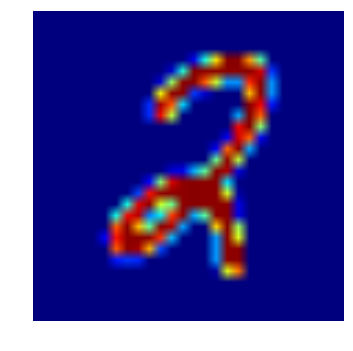

This is image from id: 4716


In [7]:
#show the test image
show_image(idx, test_images)
print "This is image from id:", idx

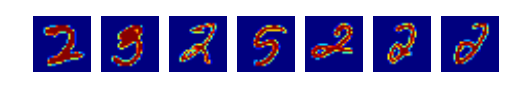

retrieved ids: [3632 5091 2265 3260 8313 4092 8928]


In [8]:
#run the test image through the network to get the test features
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state("model")
    saver.restore(sess, "model/model.ckpt")
    search_feat = sess.run(net, feed_dict={img_placeholder:[im]})
    
#calculate the cosine similarity and sort
dist = cdist(train_feat, search_feat, 'cosine')
rank = np.argsort(dist.ravel())

#show the top n similar image from train data
n = 7
show_image(rank[:n], train_images)
print "retrieved ids:", rank[:n]